In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from tensorflow.keras.preprocessing import image

- tensorflow.keras.preprocessing.image.ImageDataGenerator: Digunakan untuk augmentasi dan normalisasi data gambar.
- os: Untuk operasi sistem seperti penanganan file dan direktori.
- tensorflow: Digunakan untuk membangun dan melatih model deep learning.
- matplotlib.pyplot: Untuk visualisasi data seperti plot akurasi dan loss.
- numpy: Untuk operasi numerik.
- PIL (Python Imaging Library): Untuk memuat dan memproses gambar.
- tensorflow.keras.preprocessing.image: Untuk memuat dan memproses gambar untuk prediksi.

In [2]:
train_dir = './Datasets/train'

train_dir: Direktori tempat dataset disimpan.

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


- ImageDataGenerator: Membuat generator gambar dengan augmentasi seperti rotasi, zoom, shear, dan normalisasi.
- flow_from_directory: Membuat generator dari direktori dengan membagi data menjadi set pelatihan dan validasi.

In [4]:
num_classes = 2

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Menggunakan num_classes
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.90):
            print("\nAkurasi telah mencapai >90%!")
            self.model.stop_training = True

callbacks = myCallback()

c:\Users\LANA\anaconda3\envs\latihan_machine_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


myCallback: Callback custom untuk menghentikan pelatihan jika akurasi mencapai lebih dari 98%.

- Sequential: Model sequential yang terdiri dari beberapa lapisan.
- Conv2D: Lapisan konvolusi untuk ekstraksi fitur.
- MaxPooling2D: Lapisan pooling untuk mengurangi dimensi.
- Dropout: Untuk mencegah overfitting.
- Flatten: Meratakan hasil dari lapisan sebelumnya.
- Dense: Lapisan fully connected untuk klasifikasi akhir.

In [6]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

- compile: Mengkompilasi model dengan optimizer Adam, loss function categorical crossentropy, dan metrik akurasi.
- fit: Melatih model dengan data pelatihan dan validasi selama 50 epoch.

In [7]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    verbose=2,
    callbacks=[callbacks]
)

Epoch 1/50


c:\Users\LANA\anaconda3\envs\latihan_machine_learning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


261/261 - 148s - 569ms/step - accuracy: 0.7783 - loss: 0.4962 - val_accuracy: 0.8763 - val_loss: 0.2821
Epoch 2/50
261/261 - 85s - 327ms/step - accuracy: 0.8699 - loss: 0.3023 - val_accuracy: 0.8917 - val_loss: 0.2737
Epoch 3/50
261/261 - 82s - 316ms/step - accuracy: 0.8902 - loss: 0.2613 - val_accuracy: 0.8907 - val_loss: 0.2493
Epoch 4/50

Akurasi telah mencapai >90%!
261/261 - 93s - 355ms/step - accuracy: 0.9075 - loss: 0.2283 - val_accuracy: 0.9080 - val_loss: 0.2118


compile: Mengkompilasi model dengan optimizer Adam, loss function categorical crossentropy, dan metrik akurasi.
fit: Melatih model dengan data pelatihan dan validasi selama 50 epoch.

In [8]:
model.save('prediksi_pneumonia.h5')

save: Menyimpan model yang telah dilatih ke file .h5.

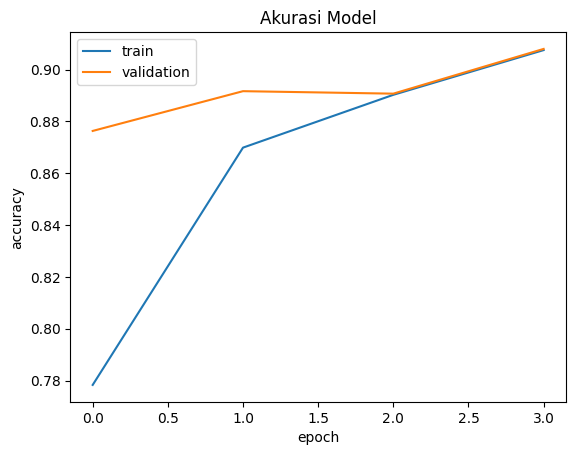

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
# Printing train and validation accuracy
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])

Training Accuracy: [0.7783369421958923, 0.869877815246582, 0.8902468085289001, 0.9075006246566772]
Validation Accuracy: [0.8763183355331421, 0.8916586637496948, 0.8906999230384827, 0.9079577922821045]


plt.plot: Membuat plot akurasi dan loss untuk data pelatihan dan validasi.

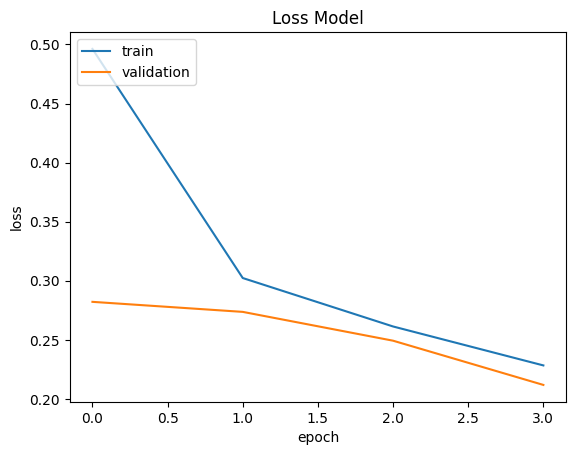

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
# Printing train and validation loss
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])

Training Loss: [0.49619731307029724, 0.3023064136505127, 0.26130762696266174, 0.2283479869365692]
Validation Loss: [0.2821497619152069, 0.2736585736274719, 0.2492707073688507, 0.21184104681015015]


In [11]:
label_to_index = train_generator.class_indices
print(label_to_index)

{'NORMAL': 0, 'PNEUMONIA': 1}


class_indices: Mendapatkan indeks label dari generator data.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


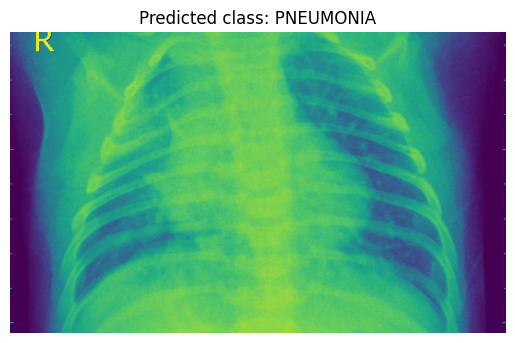

Predicted class: PNEUMONIA
Predictions: [[0.03237496 0.9676251 ]]

Pneumonia adalah infeksi pada paru-paru yang menyebabkan alveoli (kantung udara di paru-paru) terisi dengan cairan atau nanah, yang dapat mengganggu proses pertukaran oksigen dan karbon dioksida. Gejala pneumonia meliputi:
- Batuk: Sering kali dengan dahak yang bisa berwarna kuning atau hijau.
- Demam: Meningkatnya suhu tubuh yang disertai dengan menggigil.
- Sesak Napas: Sulit bernapas atau napas yang cepat dan pendek.
- Nyeri Dada: Nyeri yang terasa lebih buruk saat batuk atau bernapas dalam.
- Kelelahan: Merasa lelah atau lemah tanpa alasan yang jelas.

Pneumonia bisa disebabkan oleh berbagai mikroorganisme termasuk bakteri, virus, dan jamur. Diagnosis biasanya dilakukan melalui pemeriksaan fisik, rontgen dada, dan tes laboratorium. Perawatan tergantung pada penyebabnya dan mungkin melibatkan antibiotik, antivirus, atau antifungal.


In [12]:
# Memuat model yang telah disimpan
model = tf.keras.models.load_model('prediksi_pneumonia.h5') # load_model: Memuat model yang telah disimpan sebelumnya.


# Fungsi untuk memproses gambar
def process_image(img_path): # process_image: Memuat dan memproses gambar untuk prediksi.
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
    img_array /= 255.0  # Normalisasi
    return img_array

# Fungsi untuk melakukan prediksi
def predict_image(img_path): # predict_image: Melakukan prediksi pada gambar dan mengembalikan kelas yang diprediksi beserta probabilitas.
    img_array = process_image(img_path)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class, predictions

# Deskripsi kondisi
def get_description(label):
    if label == 'PNEUMONIA':
        return (
            "Pneumonia adalah infeksi pada paru-paru yang menyebabkan alveoli (kantung udara di paru-paru) "
            "terisi dengan cairan atau nanah, yang dapat mengganggu proses pertukaran oksigen dan karbon dioksida. "
            "Gejala pneumonia meliputi:\n"
            "- Batuk: Sering kali dengan dahak yang bisa berwarna kuning atau hijau.\n"
            "- Demam: Meningkatnya suhu tubuh yang disertai dengan menggigil.\n"
            "- Sesak Napas: Sulit bernapas atau napas yang cepat dan pendek.\n"
            "- Nyeri Dada: Nyeri yang terasa lebih buruk saat batuk atau bernapas dalam.\n"
            "- Kelelahan: Merasa lelah atau lemah tanpa alasan yang jelas.\n\n"
            "Pneumonia bisa disebabkan oleh berbagai mikroorganisme termasuk bakteri, virus, dan jamur. "
            "Diagnosis biasanya dilakukan melalui pemeriksaan fisik, rontgen dada, dan tes laboratorium. "
            "Perawatan tergantung pada penyebabnya dan mungkin melibatkan antibiotik, antivirus, atau antifungal."
        )
    elif label == 'NORMAL':
        return (
            "Paru-paru normal berarti berfungsi dengan baik dan tidak menunjukkan tanda-tanda infeksi atau "
            "kondisi medis lainnya yang mempengaruhi pernapasan. Ciri-ciri paru-paru yang sehat meliputi:\n"
            "- Pernapasan Lancar: Tidak ada kesulitan dalam bernapas, napas terasa normal dan tidak terengah-engah.\n"
            "- Tidak Ada Batuk Kronis: Tidak mengalami batuk terus-menerus atau batuk berdahak yang tidak hilang.\n"
            "- Tidak Ada Nyeri Dada: Tidak mengalami nyeri di daerah dada, terutama yang terasa lebih buruk saat bernapas atau batuk.\n"
            "- Energi dan Kesehatan Umum yang Baik: Merasa bugar dan energik tanpa gejala-gejala yang mencurigakan terkait dengan pernapasan.\n\n"
            "Paru-paru yang sehat mendukung aktivitas sehari-hari tanpa gangguan dan menjaga keseimbangan sistem pernapasan tubuh."
        )
    else:
        return "Deskripsi tidak tersedia untuk label yang diberikan."

# Fungsi untuk menampilkan gambar dengan label prediksi dan deskripsi
def show_image_with_prediction(img_path):
    img = Image.open(img_path)
    predicted_class, predictions = predict_image(img_path)
    
    # Mapping label
    label_to_index = train_generator.class_indices
    index_to_label = {v: k for k, v in label_to_index.items()}
    predicted_label = index_to_label[predicted_class[0]]
    
    # Menampilkan gambar
    plt.imshow(img)
    plt.title(f'Predicted class: {predicted_label}')
    plt.axis('off')  # Menghilangkan axis
    plt.show()

    # Menampilkan prediksi dan deskripsi
    print(f"Predicted class: {predicted_label}")
    print(f"Predictions: {predictions}")
    print("\n" + get_description(predicted_label))

# show image dari path
img_path = 'D:\\SEMESTER 6\\1. Kecerdasan Buatan AI\\TBPneumonia\\PneumoniaFIX\\Datasets\\test\\PNEUMONIA\person31_virus_70.jpeg'  # Ganti dengan path gambar yang ingin diprediksi
show_image_with_prediction(img_path)
